# 라이브러리 호출

In [35]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer



## 임의 데이터 호출

In [36]:
cancer=load_breast_cancer()

# 데이터프레임 생성

In [37]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
print('모델의 정확도 :', round(dtc.score(X_test, Y_test), 4))

모델의 정확도 : 0.886


# StandardScaler()

In [39]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, Y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, Y_test), 4))

모델의 정확도 : 0.9035


In [40]:
X_train

array([[1.916e+01, 2.660e+01, 1.262e+02, ..., 1.872e-01, 3.258e-01,
        9.720e-02],
       [1.831e+01, 1.858e+01, 1.186e+02, ..., 1.571e-01, 3.206e-01,
        6.938e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       ...,
       [1.795e+01, 2.001e+01, 1.142e+02, ..., 1.185e-01, 4.882e-01,
        6.111e-02],
       [1.955e+01, 2.877e+01, 1.336e+02, ..., 1.941e-01, 2.818e-01,
        1.005e-01],
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02]])

In [41]:
X_train_scaled

array([[ 1.40381088,  1.79283426,  1.37960065, ...,  1.044121  ,
         0.52295995,  0.64990763],
       [ 1.16565505, -0.14461158,  1.07121375, ...,  0.5940779 ,
         0.44153782, -0.85281516],
       [-0.0307278 , -0.77271123, -0.09822185, ..., -0.64047556,
        -0.31161687, -0.69292805],
       ...,
       [ 1.06478904,  0.20084323,  0.89267396, ...,  0.01694621,
         3.06583565, -1.29952679],
       [ 1.51308238,  2.3170559 ,  1.67987211, ...,  1.14728703,
        -0.16599653,  0.82816016],
       [-0.73678981, -1.02636686, -0.74380549, ..., -0.31826862,
        -0.40713129, -0.38233653]])

In [42]:
X_train_scaled.shape

(455, 30)

In [43]:
# 그래프 표시를 위해 reshape 실행 (455행 30열 -> 13650행 1열)
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

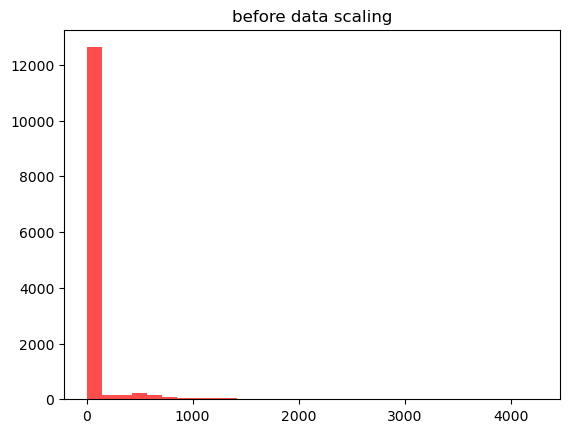

In [44]:
# 스케일링 전
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

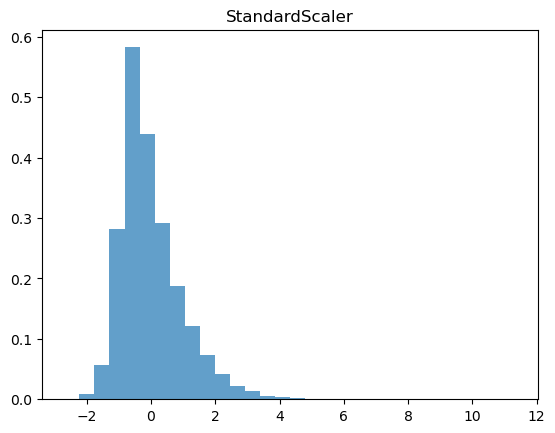

In [45]:
# 스케일링 후
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

## MinMaxScaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler 객체 생성
mms = MinMaxScaler()
#MinMaxScaler 모델 적합
mms.fit(X_train)
#MinMaxScaler 변수 변환
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
#이전에 만들어둔 의사결정나무 재적합

dtc2 = DecisionTreeClassifier()
dtc2.fit(X_train_sc, Y_train)
print('모델의 정확도 :', round(dtc2.score(X_test_sc,Y_test),4))

모델의 정확도 : 0.8947


##### 88.6에서 89.4로 정확도 상승

## MinMaxScaler 0과 1사이 분포 확인

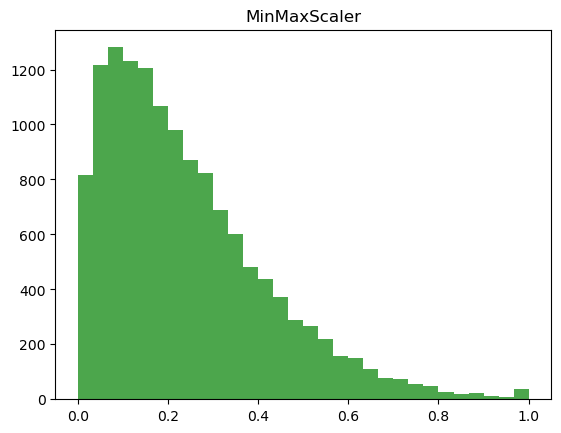

In [48]:
X_Train_sc_mms = X_train_sc.reshape(13650,1)
plt.hist(X_Train_sc_mms, bins = 30, color = 'green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

# MaxAbsScaler

In [51]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
mas.fit(X_train)
X_train_sc = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)
#의사결정나무 생성 및 적합
dtc3 = DecisionTreeClassifier()
dtc3.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc3.score(X_test_sc,Y_test),4))

모델의 정확도 : 0.7895


In [52]:
#### 이상치가 있어서인지 모델의 정확도가 더 떨어짐

# MaxAbsScaler 분포 확인

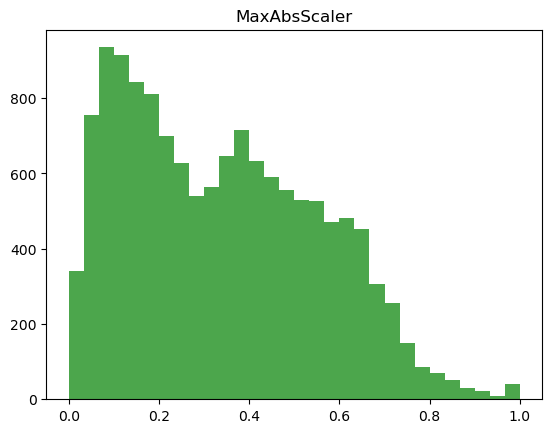

In [53]:
X_Train_sc_mms = X_train_sc.reshape(13650,1)
plt.hist(X_Train_sc_mms, bins = 30, color = 'green', alpha = 0.7)
plt.title('MaxAbsScaler')
plt.show()

# RobustScaler

In [58]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
rbs.fit(X_train)

#모델 적합
X_train_sc = rbs.transform(X_train)
X_test_sc = rbs.transform(X_test)
#의사결정나무 생성 및 적합
dtc4 = DecisionTreeClassifier()
dtc4.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc4.score(X_test_sc,Y_test),4))

모델의 정확도 : 0.8509


## Robust Scaler 분포 확인

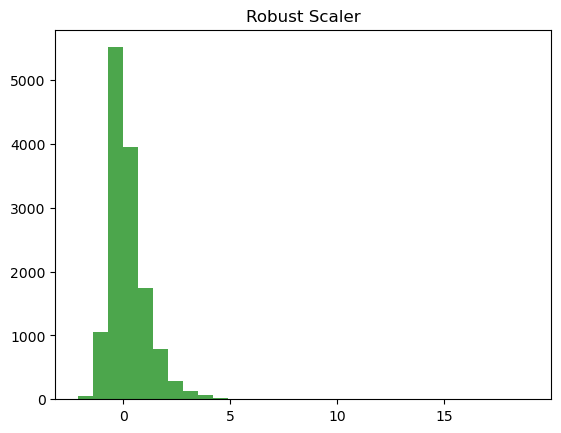

In [59]:
X_Train_sc_rbs = X_train_sc.reshape(13650,1)
plt.hist(X_Train_sc_rbs, bins = 30, color = 'green', alpha = 0.7)
plt.title('Robust Scaler')
plt.show()